# For this Capstone Project we will be analyzing some 911 call data from Kaggle. 

# Just go along with this notebook and try to complete some tasks using my Python and Data Science skills!

In [1]:
# First of all, I will import the two libraries that will help me analyze the 911 data. 
# One of them is the poweful Pandas.🐼

import numpy as np
import pandas as pd

In [2]:
# Secondly, I will import the libraries for data visualization.
# For a greater practicality, I will tap a code which will enable to watch the graphs after coding them.

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# Now I will read the file that I will analyze and visualize.
df = pd.read_csv('../input/911.csv')

In [4]:
# Let's extract some informations from this file.

df.info()   # We can see that there are more than 300,000 entries and 9 columns. 
            # There are numbers (floats and integers) and strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [5]:
# Let's check the head!

df.head()   # The data contains the following fields:

            # lat : String variable, Latitude
            # lng: String variable, Longitude
            # desc: String variable, Description of the Emergency Call
            # zip: String variable, Zipcode
            # title: String variable, Title
            # timeStamp: String variable, YYYY-MM-DD HH:MM:SS
            # twp: String variable, Township
            # addr: String variable, Address
            # e: String variable, Dummy variable (always 1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
# Now I will answer some basic questions!

In [7]:
# What're the top 5 zipcodes for 911 calls?

df.zip.value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [8]:
# What're the top 5 townships (twp) for 911 calls?

df.twp.value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [9]:
# How many unique title codes are there?

df.title.nunique()

141

In [10]:
# To better understand the informations whitin the data and posteriorly to use for a better prediction, ...
# ... is important create a new column from 'title' column with only the Reason.

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [11]:
# Lets check the result!

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


In [12]:
# What's the most common Reason for a 911 call based in this new column?

df.Reason.value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

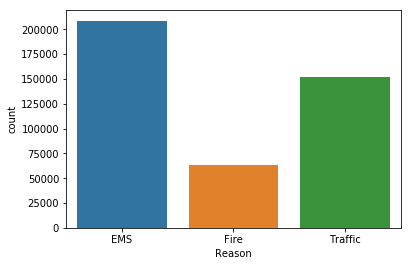

In [13]:
# Let's do the first graph visualization.
# "911 calls X Reason""

sns.countplot(x='Reason', data=df)

In [14]:
# What's the data type of the objects in the 'timeStamp' column?

type(df['timeStamp'].iloc[0])

str

In [15]:
# The timestamps are still strings. 
# I have to convert the column to DateTime objects with the purpose to better use in data analize.

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
# One more time, to good understand the informations and get a better prediction, ...
# ... is important create new columns, from 'timeStamp' column, called 'Hour', 'Month' and 'Day of Week'.

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# Let's see the result.

df.head(3) 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


In [17]:
# The 'Day of Week' column has only number instead of strings, such as 'Mon', 'Sun', 'Thu' and so on.
# I will solve this problem.

dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

# Let's check if the problem was solved.

df.head(3) # Now we can see that the values in the 'Day of Week'changed from number to days of week.

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu


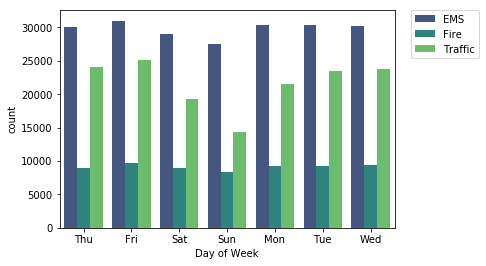

In [18]:
# Now I can use these new columns to do a new graph using 'Day of Week' column with the hue based in the Reason column.

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

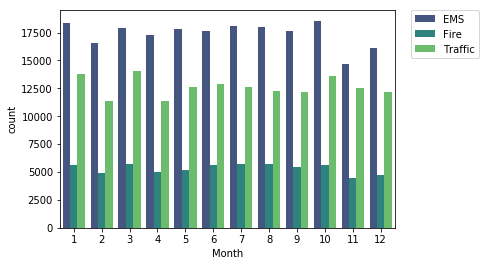

In [19]:
# Now I will do the same thing for 'Month'

sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

# We can notice that is missing some months: 9,10, and 11 are not there.

In [20]:
# let's see if we can maybe fill in this information by plotting the information in another way.
# I will create a gropuby object called 'byMonth', where I group the DataFrame by the month column and use the count() method for aggregation.

byMonth = df.groupby('Month').count()

# Let's chck the result!

byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644


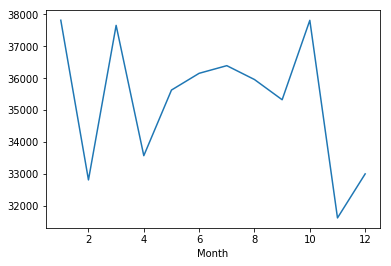

In [21]:
# Now I will create a simple plot of the dataframe indicating the count of calls per month.
# Could be any column

byMonth['twp'].plot() #That's it. I got it!

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


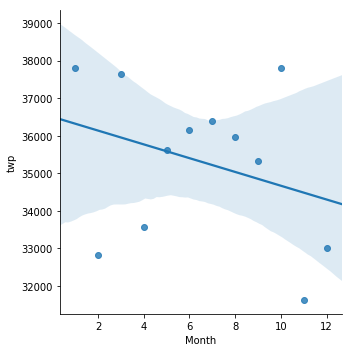

In [22]:
# I will see if I can use seaborn's lmplot() to create a linear fit on the number of calls per month. 
# I can't forget that I need to reset the index to a column.


sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [23]:
# I will create a new column called 'Date' that contains the date from the timeStamp column.
# As I sad before, these news columns helps better unsderstand the informations.

df['Date']=df['timeStamp'].apply(lambda t: t.date())

# Let's check!

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10


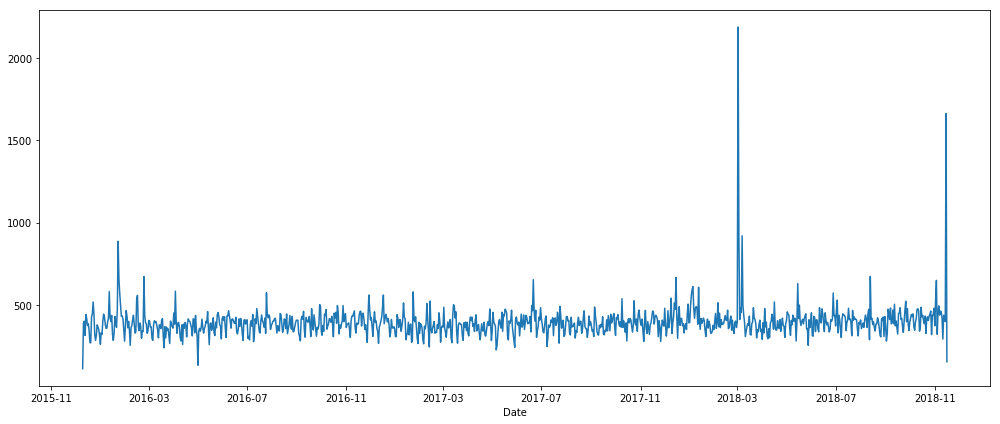

In [24]:
# Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

plt.figure(figsize=(14,6)) # To better distinguish the legends.
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

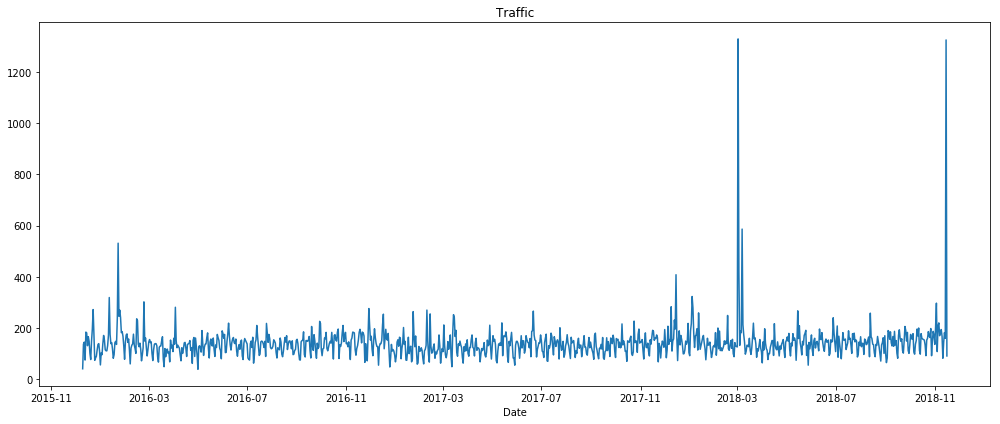

In [25]:
# Now I will recreate this plot, but creating 3 separate plots with each plot representing a Reason for the 911 call.

plt.figure(figsize=(14,6))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

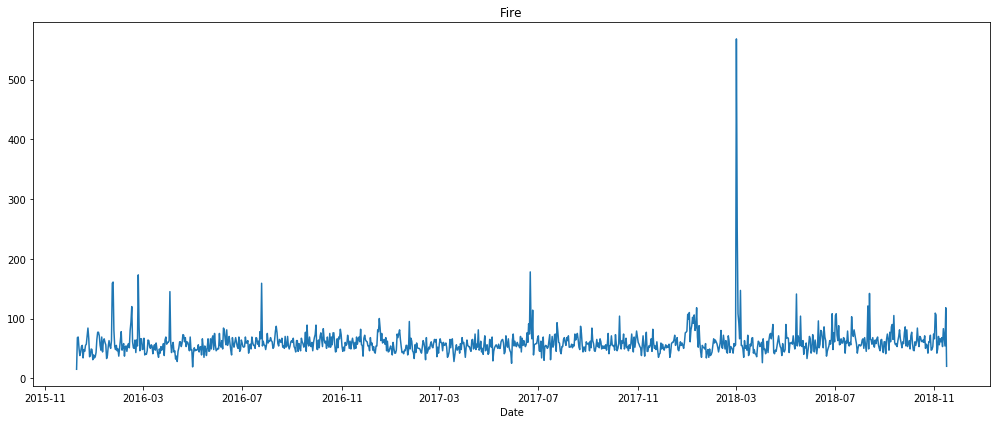

In [26]:
plt.figure(figsize=(14,6))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

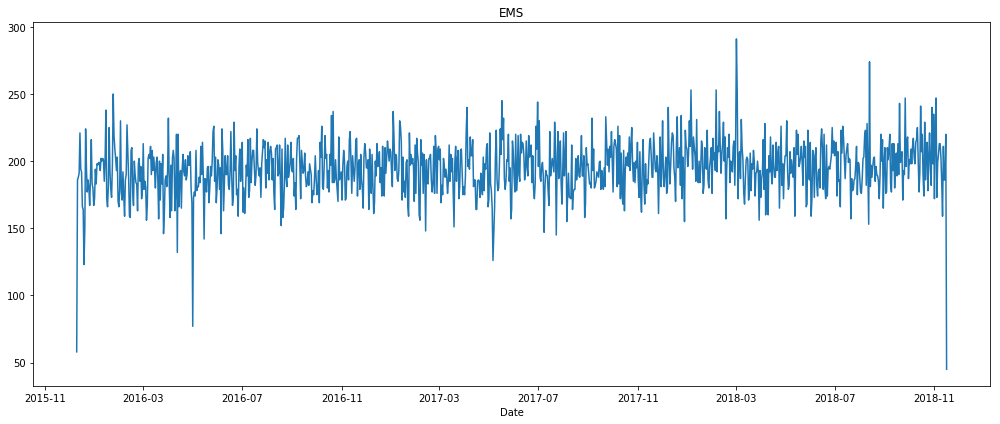

In [27]:
plt.figure(figsize=(14,6))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

# we can conclude that the 'Fire' has the lowest rate of call and 'EMS' has the uppest.  

In [28]:
# Now let's move on to creating heatmaps with seaborn and our data. 
# We'll first need to restructure the dataframe, so that the columns become the Hours and the Index becomes the Day of the Week.

dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

# Let'see...
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,3494,3667,3879,4002,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,3422,3600,3752,3571,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,3119,3428,3544,3524,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,2776,2787,3078,2887,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,3533,3514,3796,4031,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


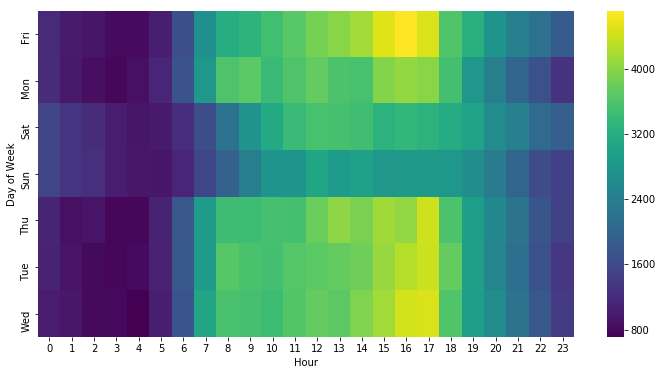

In [29]:
# Now I will create a HeatMap using this new DataFrame.

plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# We can notice that the higher volume of call happens Wednesday and Friday between 15h and 17h.

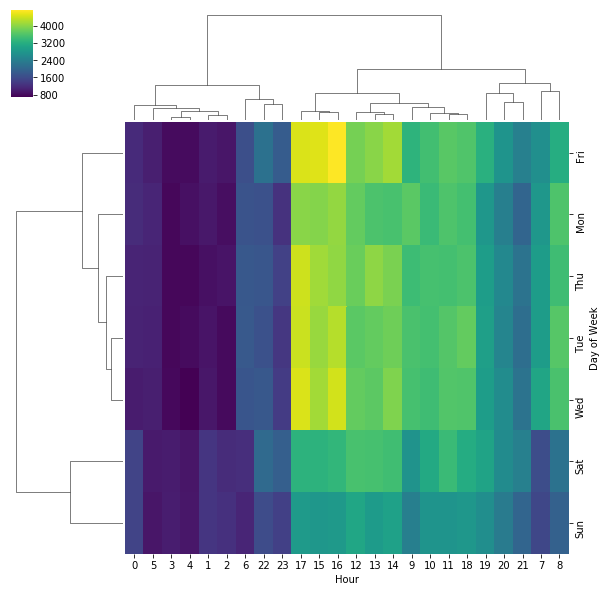

In [30]:
# Now I will create a clustermap using this DataFrame.


sns.clustermap(dayHour,cmap='viridis')

# We can notice better is this clustermap graph that the higher volume of call happens only on Friday between 15h and 17h.

In [31]:
# Now I will repeat these same plots and operations for Month as the column.
# I'm trying to get more and better informations and visualizations from data.

dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

# Let's check!

dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899


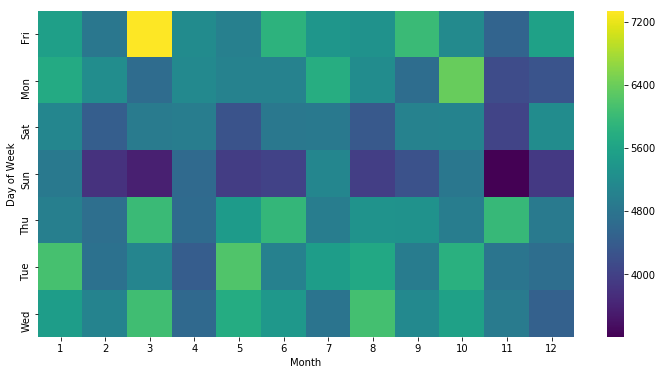

In [32]:
# Heatmap

plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

# We can notice that 'Friday' appears again, but, joining the informations from the last heatmap, the higher calls happens in March, on friday and between 15h/17h.

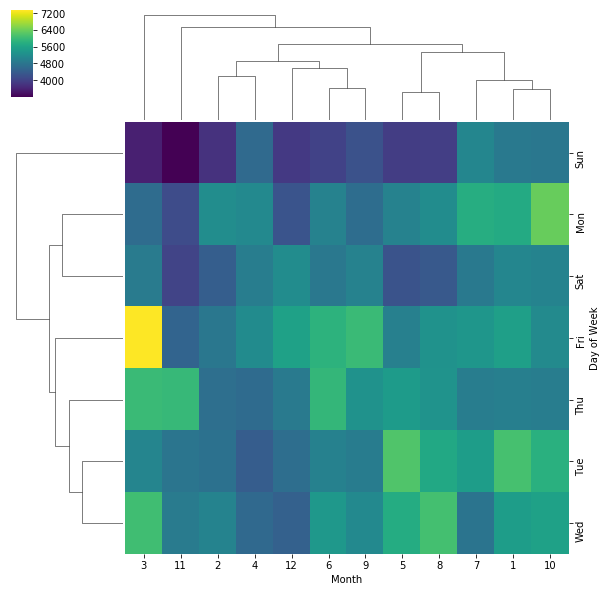

In [33]:
# Clustermap

sns.clustermap(dayMonth,cmap='viridis')

# This map reinforce the last conclusion.

# That's it!
# See you in the next Project!! 😀😎🐍